In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
bd = load_boston()
print(bd.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston = pd.DataFrame(bd.data,columns=bd.feature_names)[[
                        'RM','LSTAT','CRIM']]
print(boston.shape)
boston.head()

(506, 3)


,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [4]:
url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
titanic = pd.read_csv(url,usecols=['age','fare'])

In [6]:
print(titanic.shape)
titanic.head()

(1309, 2)


,age,fare
0,29,211.3375
1,0.9167,151.55
2,2,151.55
3,30,151.55
4,25,151.55


In [10]:
boston.isnull().sum()

RM       0
LSTAT    0
CRIM     0
dtype: int64

In [13]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   CRIM    506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     1309 non-null   object
 1   fare    1309 non-null   object
dtypes: object(2)
memory usage: 20.6+ KB


In [15]:
titanic.dropna(subset=['age','fare'],inplace=True)
titanic['age'] = pd.to_numeric(titanic['age'], errors = 'coerce')
titanic['fare'] = pd.to_numeric(titanic['fare'], errors = 'coerce')
titanic['age'] = titanic['age'].astype(float)
titanic['fare'] = titanic['fare'].astype(float)


In [16]:
titanic.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


In [18]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

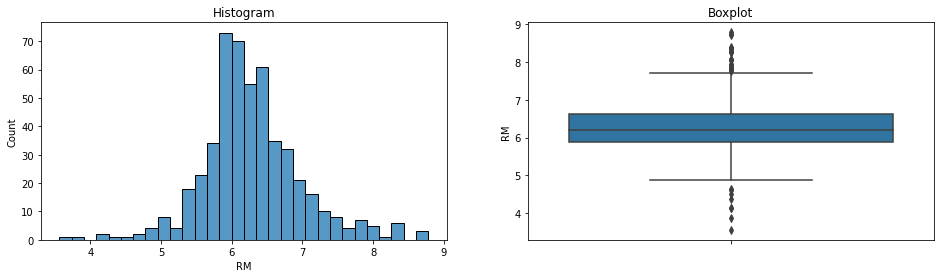

In [19]:
diagnostic_plots(boston,'RM')

In [20]:
boston.RM.skew()

0.40361213328874385

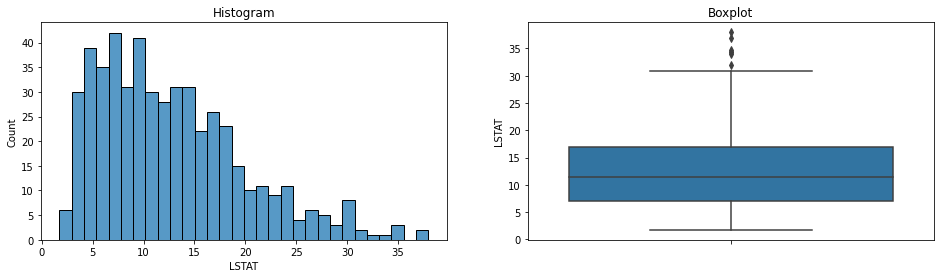

In [23]:
diagnostic_plots(boston, 'LSTAT')

In [24]:
boston.LSTAT.skew()

0.9064600935915367

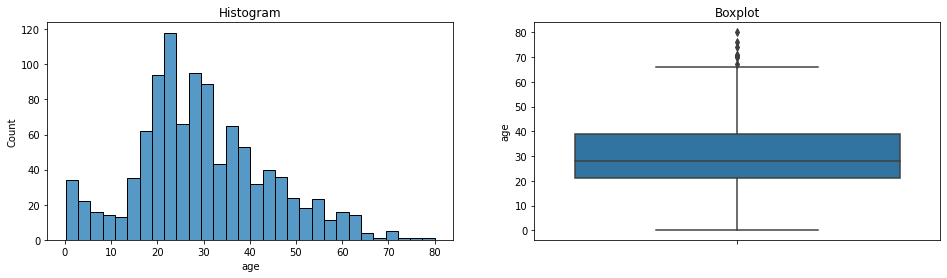

In [21]:
diagnostic_plots(titanic,'age')

In [22]:
titanic.age.skew()

0.4076718864978293